# Data Implementation

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [131]:
!pip install faker

In [132]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker()

# Generate Loan Data
def generate_loan_data_with_faker(num_customers):
    data = {
        "customer_id": [f"C{i+1}" for i in range(num_customers)],
        "age": [random.randint(18, 70) for _ in range(num_customers)],
        "income": [random.randint(15000, 200000) for _ in range(num_customers)],
        "credit_score": [random.randint(300, 900) for _ in range(num_customers)],
        "loan_amount": [random.randint(5000, 100000) for _ in range(num_customers)],
        "interest_rate": [round(random.uniform(3.50, 6.25), 2) for _ in range(num_customers)],
        "loan_term": [random.choice([12, 24, 36, 48, 60]) for _ in range(num_customers)],
    }
    df = pd.DataFrame(data)
    df["repayment_status"] = df.apply(
        lambda x: 1 if x["credit_score"] < 700 or x["income"] < 75000 else 0,
        axis=1,
    )
    return df

# Generate Transaction Data
def generate_transaction_data_with_faker(num_transactions, num_customers):
    data = {
        "customer_id": [f"C{random.randint(1, num_customers)}" for _ in range(num_transactions)],
        "transaction_id": [fake.uuid4() for _ in range(num_transactions)],
        "transaction_amount": [round(random.uniform(10, 5000), 2) for _ in range(num_transactions)],
        "transaction_type": [random.choice(["deposit","withdrawal","Purchases","Credit Transaction","Cash Transaction",]) for _ in range(num_transactions)],
        "transaction_date": [fake.date_between(start_date="-1y", end_date="today") for _ in range(num_transactions)],
    }
    return pd.DataFrame(data)



# Generate Recommendation Data
def generate_recommendation_data_with_faker(num_interactions, num_customers):
    interaction_types = ["viewed", "clicked", "purchased"]

    viewed_options = [
        "Balance", "Transaction History", "Loan Balance", "EMI Schedule", "Fixed Deposit Details",
        "Portfolio", "Policy Details", "Bill Payment History", "Exchange Rates", "Spending Analysis"
    ]

    clicked_options = [
        "Account Details", "Statement Download", "Apply for a Loan", "EMI Calculator", "Open Fixed Deposit",
        "Mutual Fund Details", "Renew Policy", "Pay Bills", "Transfer Funds", "Set Goals"
    ]

    purchased_options = [
        "Savings Account", "Fixed Deposit", "Personal Loan", "Home Loan", "Credit Card",
        "Mutual Funds", "Life Insurance", "Health Insurance", "Forex Card", "Recurring Deposit"
    ]

    data = {
        "customer_id": [f"C{random.randint(1, num_customers)}" for _ in range(num_interactions)],
        "product_id": [fake.uuid4() for _ in range(num_interactions)],
        "interaction_type": [random.choice(interaction_types) for _ in range(num_interactions)],
        "interaction_date": [fake.date_between(start_date="-1y", end_date="today") for _ in range(num_interactions)],
    }

    interaction_details = []
    for interaction in data["interaction_type"]:
        if interaction == "viewed":
            interaction_details.append(random.choice(viewed_options))
        elif interaction == "clicked":
            interaction_details.append(random.choice(clicked_options))
        elif interaction == "purchased":
            interaction_details.append(random.choice(purchased_options))

    data["interaction_details"] = interaction_details
    return pd.DataFrame(data)


# Create datasets
num_customers = 1000
num_transactions = 6000
num_interactions = 10000

loan_data = generate_loan_data_with_faker(num_customers)
transaction_data = generate_transaction_data_with_faker(num_transactions, num_customers)
recommendation_data = generate_recommendation_data_with_faker(num_interactions, num_customers)


In [133]:
print(loan_data.shape)
print(transaction_data.shape)
print(recommendation_data.shape)

(1000, 8)
(6000, 5)
(10000, 5)


# 1) Loan Data

## Data Preprocessing

In [97]:
# loan_data.to_csv('loan_data.csv', index=False)

In [98]:
# loan_data = pd.read_csv('loan_data.csv')

In [99]:
loan_data

,customer_id,age,income,credit_score,loan_amount,interest_rate,loan_term,repayment_status
0,C1,48,95281,541,92298,4.93,36,1
1,C2,57,198801,745,18689,5.24,12,0
2,C3,68,190101,328,73462,5.59,12,1
3,C4,34,99111,858,68575,3.66,24,0
4,C5,39,55295,792,5956,5.25,60,1
...,...,...,...,...,...,...,...,...
995,C996,20,101304,371,30571,5.83,48,1
996,C997,65,61998,880,72532,4.70,24,1
997,C998,19,99224,731,22049,5.25,24,0
998,C999,25,24631,457,85493,4.86,60,1


In [100]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   object 
 1   age               1000 non-null   int64  
 2   income            1000 non-null   int64  
 3   credit_score      1000 non-null   int64  
 4   loan_amount       1000 non-null   int64  
 5   interest_rate     1000 non-null   float64
 6   loan_term         1000 non-null   int64  
 7   repayment_status  1000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [101]:
loan_data.describe()

,age,income,credit_score,loan_amount,interest_rate,loan_term,repayment_status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.323000,104759.097000,598.359000,53316.639000,4.912830,36.384000,0.777000
std,15.237153,53238.034404,173.352049,27480.378369,0.781728,16.940706,0.416467
min,18.000000,15475.000000,300.000000,5175.000000,3.510000,12.000000,0.000000
25%,33.000000,59198.250000,447.750000,28938.750000,4.250000,24.000000,1.000000
50%,46.000000,103819.000000,600.000000,53195.000000,4.970000,36.000000,1.000000
75%,58.000000,149120.500000,748.000000,77060.000000,5.582500,48.000000,1.000000
max,70.000000,199923.000000,900.000000,99980.000000,6.250000,60.000000,1.000000


In [102]:
loan_data.isnull().sum()

,0
customer_id,0
age,0
income,0
credit_score,0
loan_amount,0
interest_rate,0
loan_term,0
repayment_status,0


In [103]:
loan_data.duplicated().sum()

0

In [104]:
# Train-Test Split with Stratification
X = loan_data.drop(["customer_id", "repayment_status"], axis=1)  # Features
y = loan_data["repayment_status"]  # Target

## Visualization for Loan Data Transaction


repayment_status
1    777
0    223
Name: count, dtype: int64


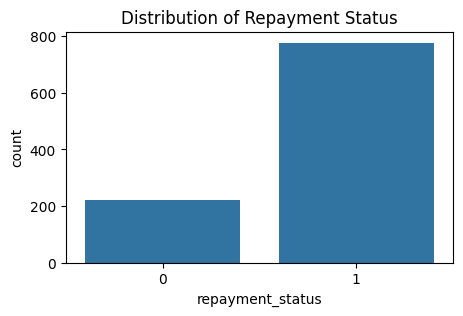

In [105]:
# Count Plot for Repayment Status
import matplotlib.pyplot as plt
import seaborn as sns


print(y.value_counts())
plt.figure(figsize=(5,3))
sns.countplot(data=loan_data, x='repayment_status')
plt.title("Distribution of Repayment Status")
plt.show()


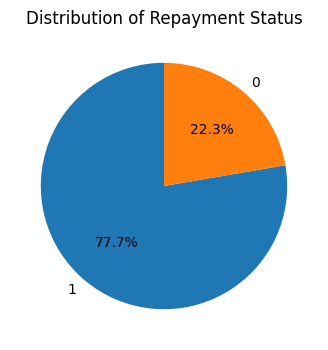

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for repayment status
repayment_counts = loan_data['repayment_status'].value_counts()

# Extract values and labels for the pie chart
values = repayment_counts.values
labels = repayment_counts.index

# Create the pie chart using matplotlib.pyplot.pie
plt.figure(figsize=(5, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Repayment Status")
plt.show()

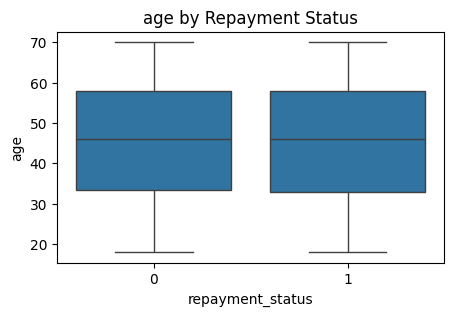

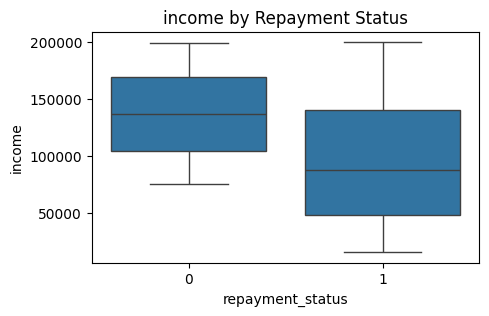

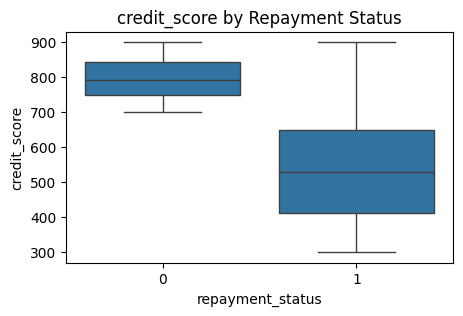

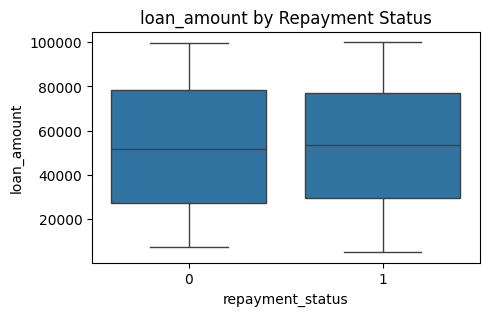

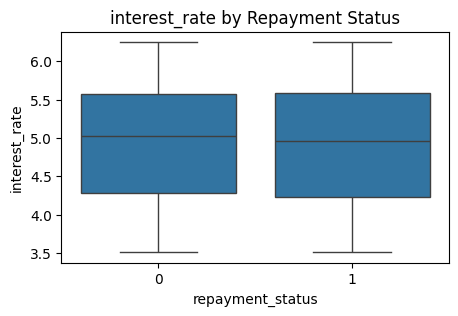

In [107]:
for col in ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate']:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=loan_data, x='repayment_status', y=col)
    plt.title(f"{col} by Repayment Status")
    plt.show()


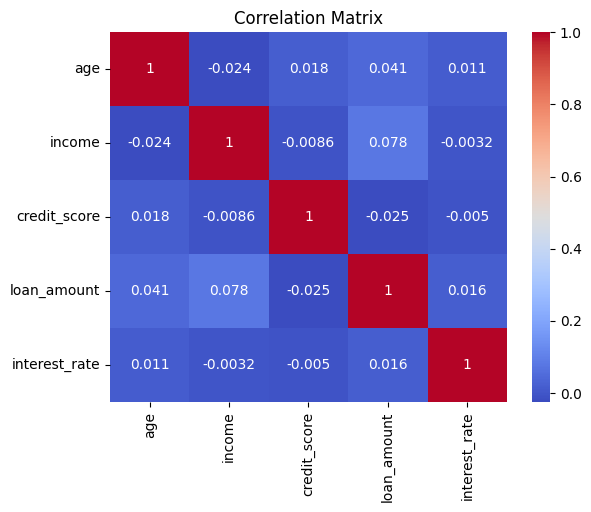

In [108]:
corr = loan_data[['age', 'income', 'credit_score', 'loan_amount', 'interest_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Encoding

In [109]:
loan_data.head()

,customer_id,age,income,credit_score,loan_amount,interest_rate,loan_term,repayment_status
0,C1,48,95281,541,92298,4.93,36,1
1,C2,57,198801,745,18689,5.24,12,0
2,C3,68,190101,328,73462,5.59,12,1
3,C4,34,99111,858,68575,3.66,24,0
4,C5,39,55295,792,5956,5.25,60,1


In [110]:
#get the numerical columns
numerical_cols = loan_data.select_dtypes(include='number').columns
numerical_cols

Index(['age', 'income', 'credit_score', 'loan_amount', 'interest_rate',
       'loan_term', 'repayment_status'],
      dtype='object')

In [111]:
# Standardizing the loan_data
from sklearn.preprocessing import StandardScaler
num_col = ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate', 'loan_term']

scaler = StandardScaler()
loan_data[num_col] = scaler.fit_transform(loan_data[num_col])

In [112]:
loan_data.head()

,customer_id,age,income,credit_score,loan_amount,interest_rate,loan_term,repayment_status
0,C1,0.175777,-0.178122,-0.331047,1.419226,0.021975,-0.022679,1
1,C2,0.766734,1.767326,0.846338,-1.260716,0.418731,-1.440094,0
2,C3,1.489015,1.603827,-1.560375,0.733448,0.866681,-1.440094,1
3,C4,-0.743490,-0.106144,1.498517,0.555523,-1.603444,-0.731386,0
4,C5,-0.415180,-0.929577,1.117598,-1.724297,0.431529,1.394736,1


In [113]:
# Train-Test Split with Stratification
X = loan_data.drop(["customer_id", "repayment_status"], axis=1)  # Features
y = loan_data["repayment_status"]  # Target

In [114]:
#  The Data is Imbalanced
y.value_counts()

,count
repayment_status,
1,777
0,223


## Model Selection

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 6), (300, 6), (700,), (300,))

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Logistic Regression

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       156
           1       0.94      0.96      0.95       544

    accuracy                           0.92       700
   macro avg       0.90      0.87      0.88       700
weighted avg       0.92      0.92      0.92       700

---------------------------------------------------
Classification Report Test Data
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        67
           1       0.94      0.95      0.94       233

    accuracy                           0.91       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.91      0.91      0.91       300



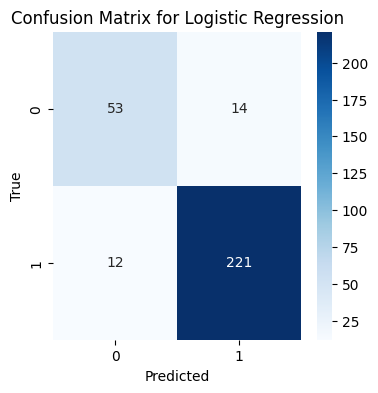

In [118]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

# Evaluate the model
print("Classification Report Train Data")
print(classification_report(y_train, y_pred_train))
print('---------------------------------------------------')
print("Classification Report Test Data")
print(classification_report(y_test, y_pred))



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
#print(cm)
# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### RandomForest

Classification Report Train Data (Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       544

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

---------------------------------------------------
Classification Report Test Data (Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       233

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



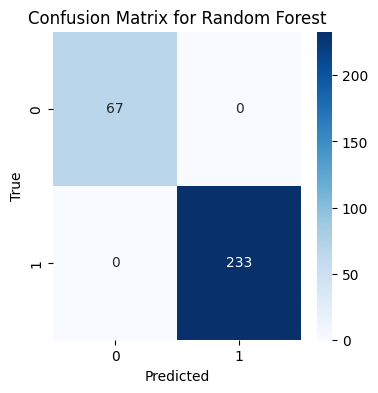

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_classifier.predict(X_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report Train Data (Random Forest)")
print(classification_report(y_train, y_pred_rf_train))
print('---------------------------------------------------')
print("Classification Report Test Data (Random Forest)")
print(classification_report(y_test, y_pred_rf))


# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


### Gradient Boosting

Classification Report Train Data (Gradient Boosting)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       544

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

---------------------------------------------------
Classification Report Test Data (Gradient Boosting)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       233

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



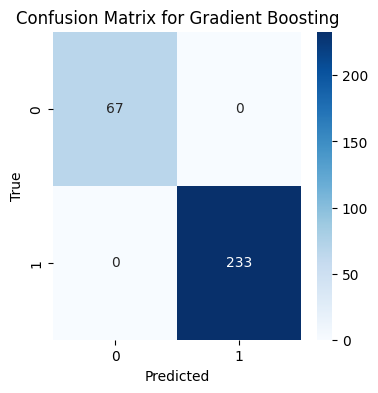

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb_train = gb_classifier.predict(X_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report Train Data (Gradient Boosting)")
print(classification_report(y_train, y_pred_gb_train))
print('---------------------------------------------------')
print("Classification Report Test Data (Gradient Boosting)")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()


## Best Model as Gradient Boosting
Gradient Boosting is slightly better than Random Forest, especially in recall & overall accuracy.
* Higher recall (0.98 vs. 0.94 for Class 0) means GB reduces false negatives better.
* Perfect F1-score & accuracy in GB indicate a strong ability to generalize on test data.
* Better for imbalanced datasets, as it boosts weak predictions iteratively.

Final Verdict: Gradient Boosting is the better model

In [121]:
y.value_counts()

,count
repayment_status,
1,777
0,223


repayment_status
0    544
1    544
Name: count, dtype: int64
Classification Report Test Data (Gradient Boosting with SMOTE)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       233

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



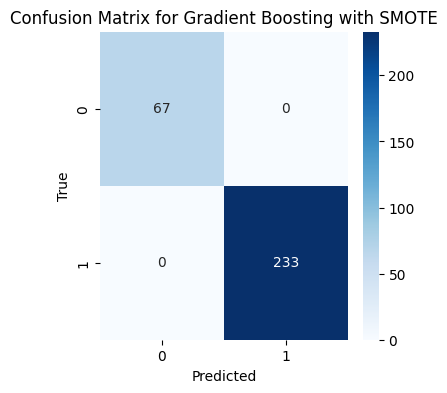

In [122]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(pd.Series(y_train_resampled).value_counts())

# Initialize and train the Gradient Boosting Classifier with resampled data
gb_classifier_smote = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_gb_smote = gb_classifier_smote.predict(X_test)

# Evaluate the model
print("Classification Report Test Data (Gradient Boosting with SMOTE)")
print(classification_report(y_test, y_pred_gb_smote))

# Confusion Matrix for Gradient Boosting with SMOTE
cm_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_gb_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gradient Boosting with SMOTE')
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9919986949961258
Classification Report Test Data (Best Gradient Boosting with SMOTE)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       233

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



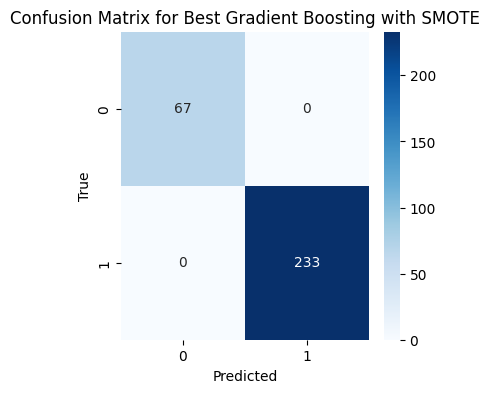

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid_gb,
    cv=5,
    scoring='f1',  # Using F1-score for imbalanced data
    verbose=1,
    n_jobs=-1
)

grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters (Gradient Boosting):", grid_search_gb.best_params_)
print("Best Score:", grid_search_gb.best_score_)

# Evaluate the best model on the test set
best_gb_classifier = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_classifier.predict(X_test)

print("Classification Report Test Data (Best Gradient Boosting with SMOTE)")
print(classification_report(y_test, y_pred_best_gb))

cm_best_gb_smote = confusion_matrix(y_test, y_pred_best_gb)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_best_gb_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Gradient Boosting with SMOTE')
plt.show()

# 2) Transaction Data

In [158]:
transaction_data

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date
0,C769,f115601c-8ad9-403c-a4f8-b7a9de4950fe,1399.03,Purchases,2024-05-31
1,C392,ee5e172e-cfdb-483d-a749-f799f6524449,2170.35,Cash Transaction,2024-07-15
2,C29,1ddd7e09-f458-4504-af97-694445f9445f,3240.48,Credit Transaction,2024-04-06
3,C561,249ecc53-c4b3-45d6-875e-e238585341a0,1091.08,deposit,2024-06-21
4,C457,4b0ca6ab-5d6d-475e-aa8b-71d53f88be52,1527.26,Purchases,2024-07-29
...,...,...,...,...,...
5995,C31,b0ec0745-3439-48c3-b448-20579bddb46d,882.80,Credit Transaction,2024-10-18
5996,C958,f98155c9-2d36-46c6-a1d1-704b344a9968,4749.00,Cash Transaction,2024-10-22
5997,C816,04683fe5-eb4a-442e-ac61-d7ba432616fa,3895.77,deposit,2024-10-09
5998,C495,80c866fb-ee16-4d70-92ff-6389c334eef0,2940.91,Credit Transaction,2024-11-28


## Data cleaning and Preprocessing

In [159]:
#transaction_data.to_csv('transaction_data.csv', index=False)

In [160]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   object 
 1   transaction_id      6000 non-null   object 
 2   transaction_amount  6000 non-null   float64
 3   transaction_type    6000 non-null   object 
 4   transaction_date    6000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 234.5+ KB


In [161]:
transaction_data.describe()

,transaction_amount
count,6000.000000
mean,2525.945697
std,1439.537393
min,10.420000
25%,1291.962500
50%,2529.365000
75%,3789.942500
max,4999.180000


In [162]:
transaction_data.nunique()

,0
customer_id,998
transaction_id,6000
transaction_amount,5964
transaction_type,5
transaction_date,366


In [163]:
transaction_data.transaction_type.unique()

array(['Purchases', 'Cash Transaction', 'Credit Transaction', 'deposit',
       'withdrawal'], dtype=object)

In [164]:
transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])



transaction_data['transaction_year'] = transaction_data['transaction_date'].dt.year
transaction_data['transaction_month'] = transaction_data['transaction_date'].dt.month
transaction_data['transaction_day'] = transaction_data['transaction_date'].dt.day
transaction_data.head(1)

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date,transaction_year,transaction_month,transaction_day
0,C769,f115601c-8ad9-403c-a4f8-b7a9de4950fe,1399.03,Purchases,2024-05-31,2024,5,31


In [165]:
transaction_data['transaction_year'].unique()

array([2024, 2025], dtype=int32)

## Visualization for Transaction Data

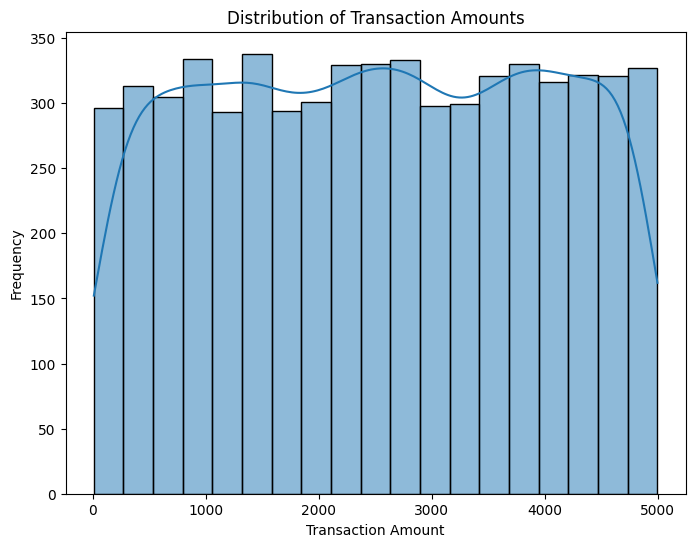

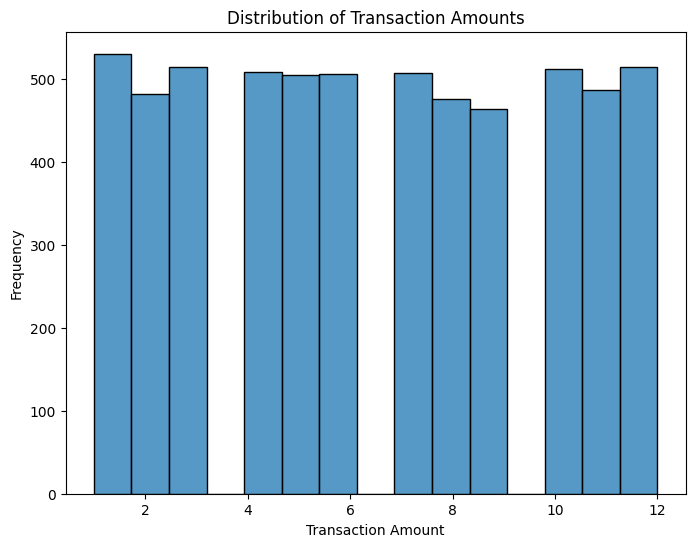

In [166]:
# Distribution of transaction amounts
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data['transaction_amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of transaction amounts
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data['transaction_month'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

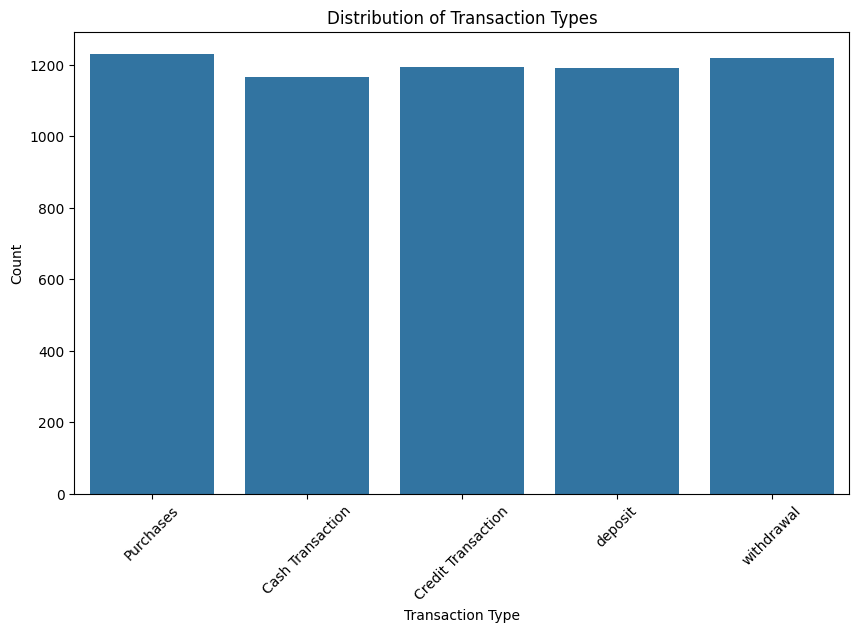

In [167]:
# Transaction type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_type', data=transaction_data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

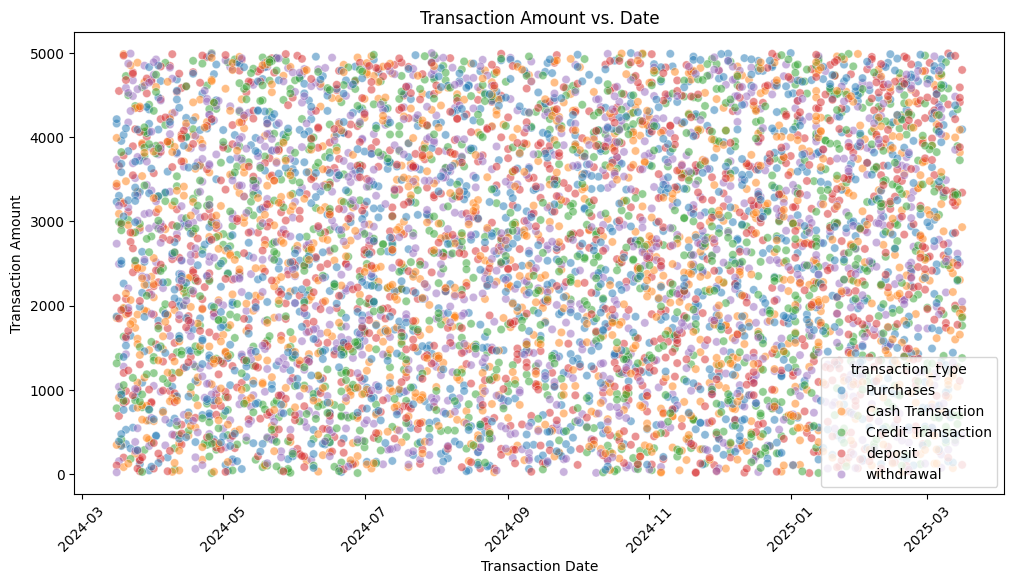

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='transaction_date', y='transaction_amount', data=transaction_data, hue='transaction_type', alpha=0.5)
plt.title('Transaction Amount vs. Date')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()


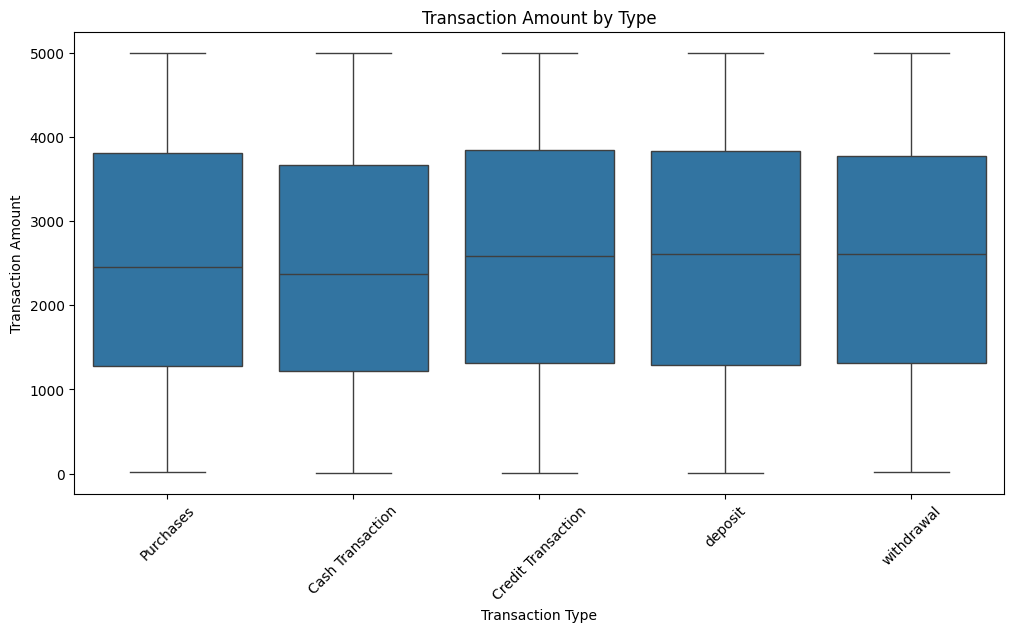

In [169]:
# Transaction amount by type
plt.figure(figsize=(12, 6))
sns.boxplot(x='transaction_type', y='transaction_amount', data=transaction_data)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

## Kmeans with Label Encoding

In [170]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

transaction_data['transaction_type_encoded'] = label_encoder.fit_transform(transaction_data['transaction_type'])
transaction_data.head()

transaction_data[['transaction_type','transaction_type_encoded']].value_counts().sort_index()

,,count
transaction_type,transaction_type_encoded,
Cash Transaction,0,1166
Credit Transaction,1,1193
Purchases,2,1231
deposit,3,1191
withdrawal,4,1219


In [171]:
features = ['transaction_amount', 'transaction_year', 'transaction_month', 'transaction_day', 'transaction_type_encoded']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(transaction_data[features])

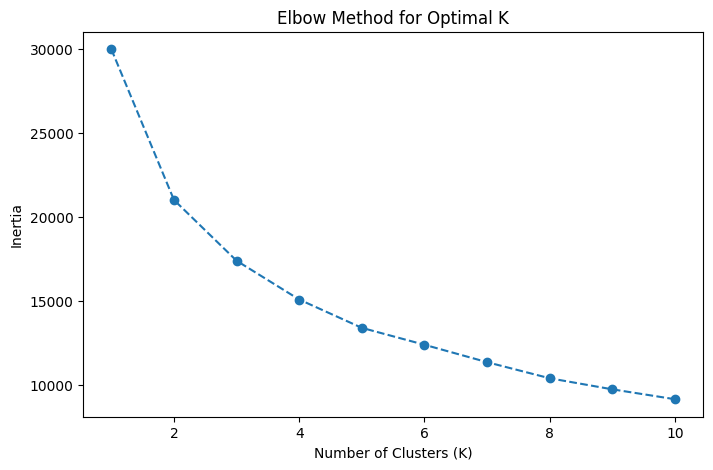

In [172]:
# Determine optimal K using the Elbow Method
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [173]:
# Applying K-Means with chosen K (replace '3' with the optimal K from the Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
transaction_data['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# Check the first few rows with assigned clusters
transaction_data[['customer_id', 'transaction_id', 'transaction_amount', 'transaction_type', 'kmeans_cluster']].head()



,customer_id,transaction_id,transaction_amount,transaction_type,kmeans_cluster
0,C769,f115601c-8ad9-403c-a4f8-b7a9de4950fe,1399.03,Purchases,1
1,C392,ee5e172e-cfdb-483d-a749-f799f6524449,2170.35,Cash Transaction,1
2,C29,1ddd7e09-f458-4504-af97-694445f9445f,3240.48,Credit Transaction,1
3,C561,249ecc53-c4b3-45d6-875e-e238585341a0,1091.08,deposit,0
4,C457,4b0ca6ab-5d6d-475e-aa8b-71d53f88be52,1527.26,Purchases,1


In [174]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, transaction_data['kmeans_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(df_scaled, transaction_data['kmeans_cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


Silhouette Score: 0.24049697052971017
Davies-Bouldin Index: 1.6051102652167415


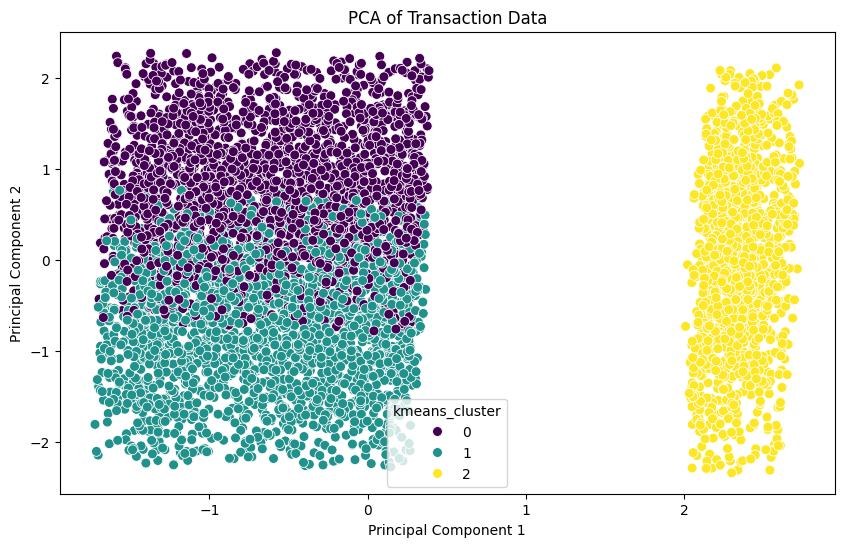

In [175]:
# prompt: from sklearn.decomposition import PCA
# do this

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'df_scaled' from the previous code is available
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the cluster information back
pca_df['kmeans_cluster'] = transaction_data['kmeans_cluster']

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster', data=pca_df, palette='viridis', s=50)
plt.title('PCA of Transaction Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


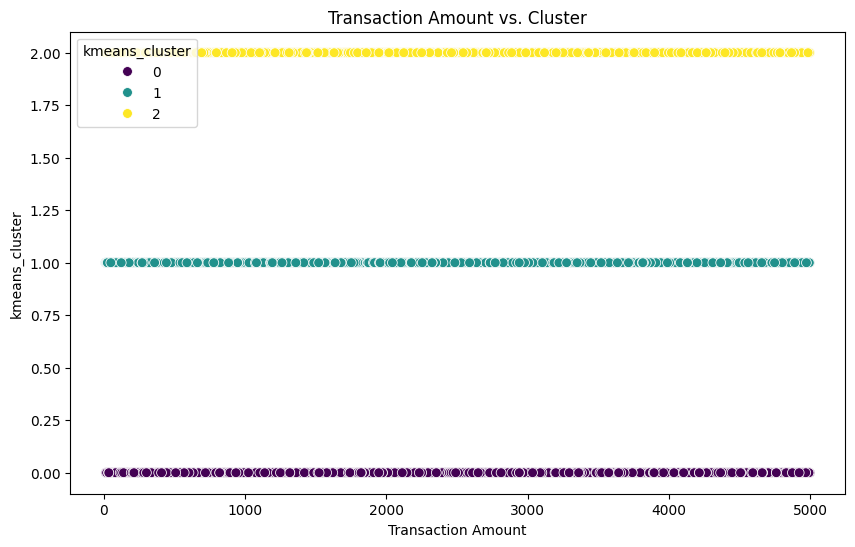

In [176]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='kmeans_cluster', hue='kmeans_cluster', data=transaction_data, palette='viridis', s=50)
plt.title('Transaction Amount vs. Cluster')
plt.xlabel('Transaction Amount')
plt.ylabel('kmeans_cluster')
plt.show()


In [177]:
df_grouped = transaction_data.groupby(['kmeans_cluster', 'transaction_type'])['transaction_id'].count()

most_frequent_transactions = df_grouped.groupby('kmeans_cluster').idxmax()

print("Most Frequent Transaction Type per Cluster:")
for kmeans_cluster, transaction_type in most_frequent_transactions:
    print(f"Cluster {kmeans_cluster} is dominated by {transaction_type} transactions.")

Most Frequent Transaction Type per Cluster:
Cluster 0 is dominated by withdrawal transactions.
Cluster 1 is dominated by Cash Transaction transactions.
Cluster 2 is dominated by deposit transactions.


## Hierarchical Clustering with Label Encoding

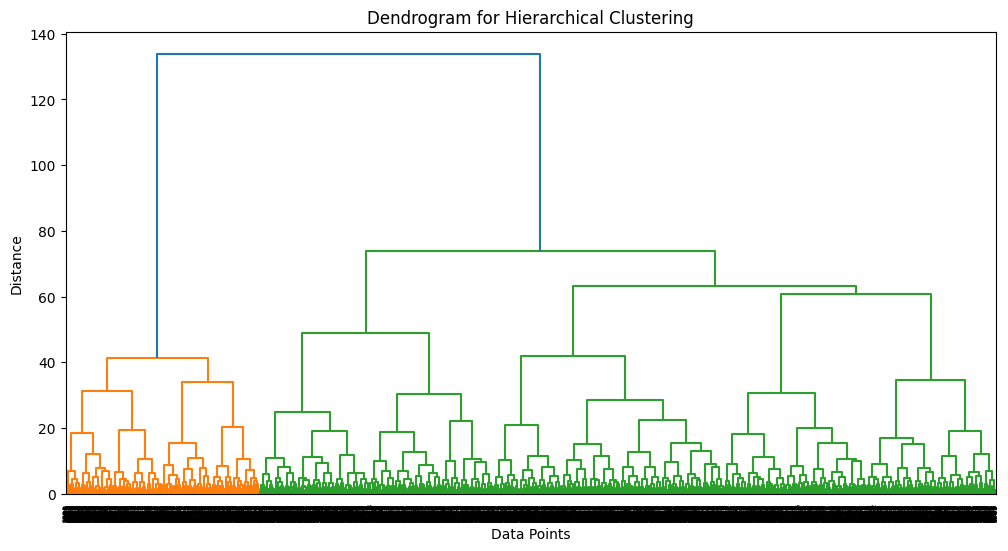

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Relevant features for clustering
features = ['transaction_amount', 'transaction_year', 'transaction_month', 'transaction_day', 'transaction_type_encoded']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(transaction_data[features])

# Compute the linkage matrix using Ward's method
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


In [179]:
# Choose number of clusters based on Dendrogram
num_clusters = 3

# Fit Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
transaction_data['hierarchical_cluster'] = agg_clustering.fit_predict(df_scaled)

# Check the first few rows
transaction_data[['customer_id', 'transaction_id', 'transaction_amount', 'transaction_type', 'hierarchical_cluster']].head()


,customer_id,transaction_id,transaction_amount,transaction_type,hierarchical_cluster
0,C769,f115601c-8ad9-403c-a4f8-b7a9de4950fe,1399.03,Purchases,2
1,C392,ee5e172e-cfdb-483d-a749-f799f6524449,2170.35,Cash Transaction,2
2,C29,1ddd7e09-f458-4504-af97-694445f9445f,3240.48,Credit Transaction,0
3,C561,249ecc53-c4b3-45d6-875e-e238585341a0,1091.08,deposit,0
4,C457,4b0ca6ab-5d6d-475e-aa8b-71d53f88be52,1527.26,Purchases,2


In [180]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(df_scaled, transaction_data['hierarchical_cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Compute Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(df_scaled, transaction_data['hierarchical_cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index:.4f}")


Silhouette Score: 0.2078
Davies-Bouldin Index: 1.7328


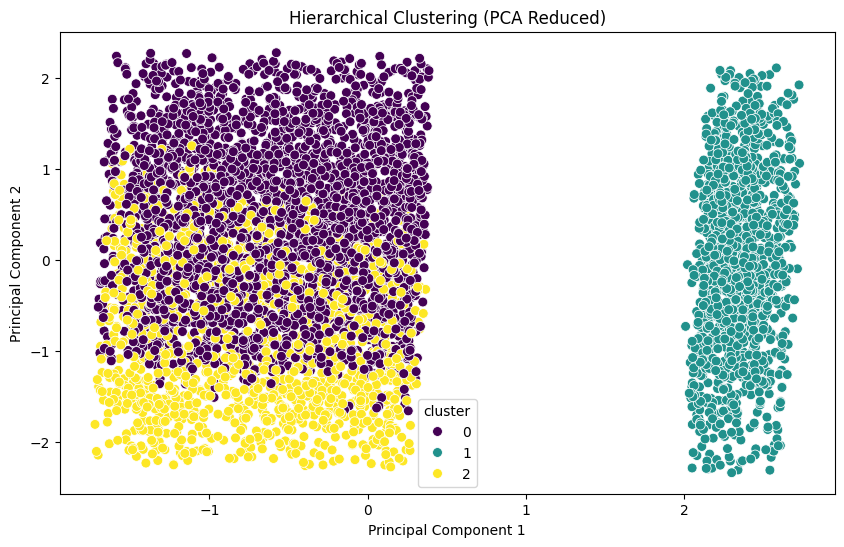

In [181]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = transaction_data['hierarchical_cluster']

# Plot PCA with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [182]:
df_grouped = transaction_data.groupby(['hierarchical_cluster', 'transaction_type'])['transaction_id'].count()
most_frequent_transactions = df_grouped.groupby('hierarchical_cluster').idxmax()

print("Most Frequent Transaction Type per Cluster:")
for cluster, transaction_type in most_frequent_transactions:
    print(f"Cluster {cluster} is dominated by {transaction_type} transactions.")


Most Frequent Transaction Type per Cluster:
Cluster 0 is dominated by withdrawal transactions.
Cluster 1 is dominated by deposit transactions.
Cluster 2 is dominated by Cash Transaction transactions.


## Kmeans with one Hot encoding

In [183]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = transaction_data.copy()

# Feature Engineering on transaction_date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.month
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# One-Hot Encode transaction_type
df_encoded = pd.get_dummies(df, columns=['transaction_type'], drop_first=True)

# Selecting Features for Clustering
features =  ['transaction_amount', 'transaction_year', 'transaction_month', 'transaction_day'] + list(df_encoded.columns[df_encoded.columns.str.startswith("transaction_type_")])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features])

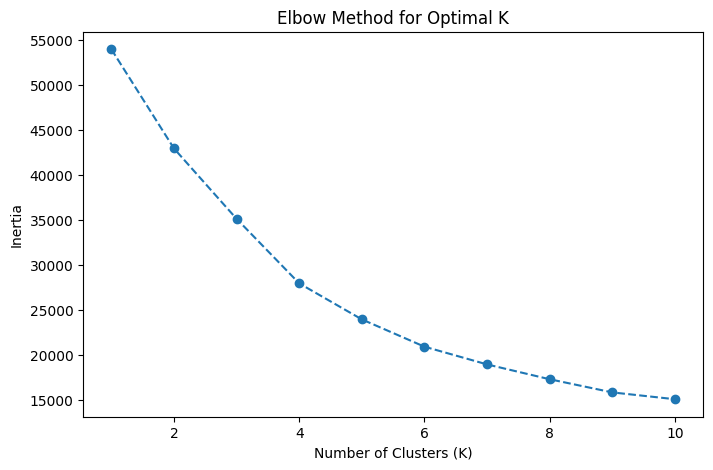

In [184]:
# Determine optimal K using the Elbow Method
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [185]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose optimal K using the elbow method
df['cluster'] = kmeans.fit_predict(df_scaled)

# View cluster assignments
print(df[['customer_id', 'transaction_id', 'cluster']].head())

  customer_id                        transaction_id  cluster
0        C769  f115601c-8ad9-403c-a4f8-b7a9de4950fe        1
1        C392  ee5e172e-cfdb-483d-a749-f799f6524449        3
2         C29  1ddd7e09-f458-4504-af97-694445f9445f        3
3        C561  249ecc53-c4b3-45d6-875e-e238585341a0        2
4        C457  4b0ca6ab-5d6d-475e-aa8b-71d53f88be52        1


In [186]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(df_scaled, df['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


Silhouette Score: 0.27402471746290524
Davies-Bouldin Index: 1.4058429515776059


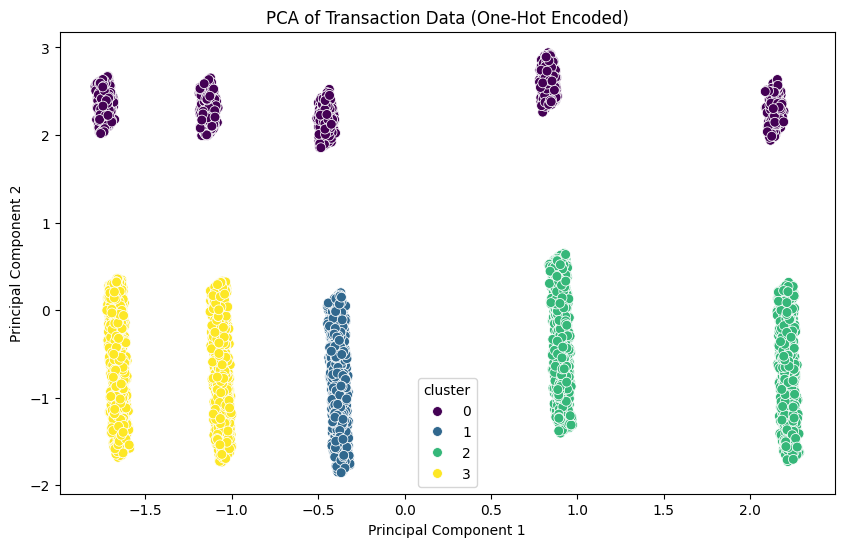

In [187]:
from sklearn.decomposition import PCA

# Assuming 'df_scaled' from the previous one-hot encoding and k-means section is available

pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the cluster information back
pca_df['cluster'] = df['cluster']

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('PCA of Transaction Data (One-Hot Encoded)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


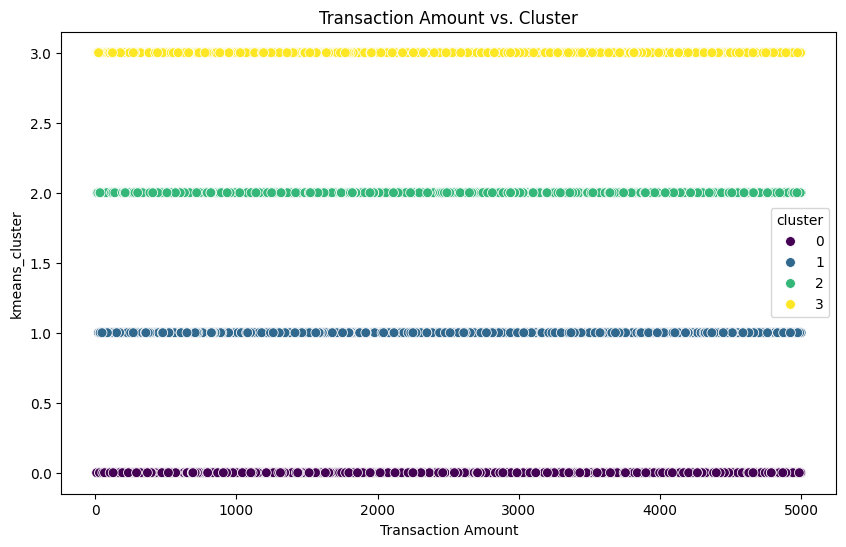

In [188]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='cluster', hue='cluster', data=df, palette='viridis', s=50) # Changed the data to df from transaction_data
plt.title('Transaction Amount vs. Cluster')
plt.xlabel('Transaction Amount')
plt.ylabel('kmeans_cluster')
plt.show()

In [189]:
df_grouped = df.groupby(['cluster', 'transaction_type'])['transaction_id'].count()

most_frequent_transactions = df_grouped.groupby('cluster').idxmax()

print("Most Frequent Transaction Type per Cluster:")
for cluster, transaction_type in most_frequent_transactions:
    print(f"Cluster {cluster} is dominated by {transaction_type} transactions.")

Most Frequent Transaction Type per Cluster:
Cluster 0 is dominated by deposit transactions.
Cluster 1 is dominated by Purchases transactions.
Cluster 2 is dominated by withdrawal transactions.
Cluster 3 is dominated by Cash Transaction transactions.


## Hierarchical Clustering with one hot encoding

In [190]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = transaction_data.copy()

# Feature Engineering on transaction_date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.month
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# One-Hot Encode transaction_type
df_encoded = pd.get_dummies(df, columns=['transaction_type'], drop_first=True)

# Selecting Features for Clustering
features =  ['transaction_amount', 'transaction_year', 'transaction_month', 'transaction_day'] + list(df_encoded.columns[df_encoded.columns.str.startswith("transaction_type_")])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features])

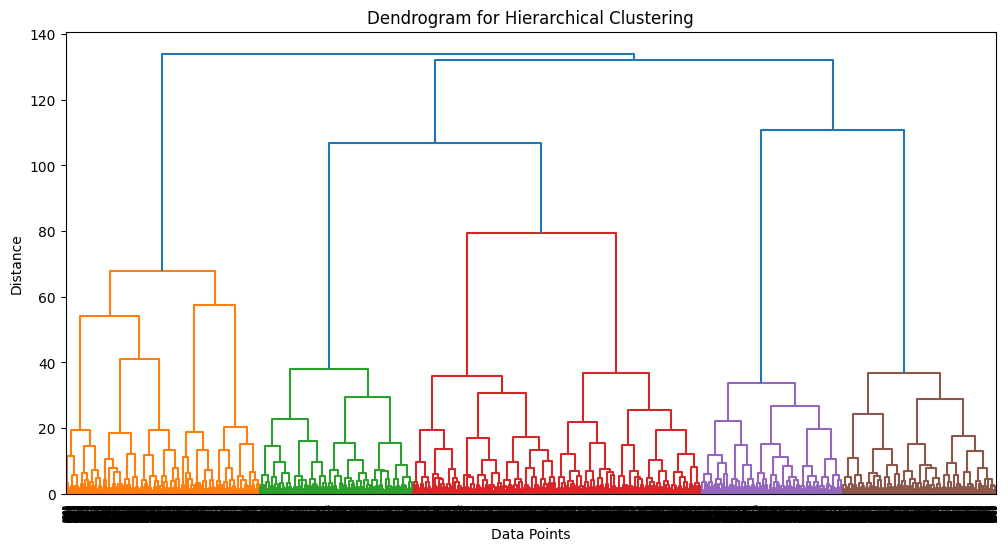

In [191]:
# Compute the linkage matrix using Ward's method
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


linkage_matrix = linkage(df_scaled, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [192]:
# Choose number of clusters based on Dendrogram
num_clusters = 3

# Fit Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
transaction_data['hierarchical_cluster'] = agg_clustering.fit_predict(df_scaled)

# Check the first few rows
transaction_data[['customer_id', 'transaction_id', 'transaction_amount', 'transaction_type', 'hierarchical_cluster']].head()


,customer_id,transaction_id,transaction_amount,transaction_type,hierarchical_cluster
0,C769,f115601c-8ad9-403c-a4f8-b7a9de4950fe,1399.03,Purchases,2
1,C392,ee5e172e-cfdb-483d-a749-f799f6524449,2170.35,Cash Transaction,2
2,C29,1ddd7e09-f458-4504-af97-694445f9445f,3240.48,Credit Transaction,2
3,C561,249ecc53-c4b3-45d6-875e-e238585341a0,1091.08,deposit,0
4,C457,4b0ca6ab-5d6d-475e-aa8b-71d53f88be52,1527.26,Purchases,2


In [193]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(df_scaled, transaction_data['hierarchical_cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Compute Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(df_scaled, transaction_data['hierarchical_cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index:.4f}")


Silhouette Score: 0.2462
Davies-Bouldin Index: 1.6673


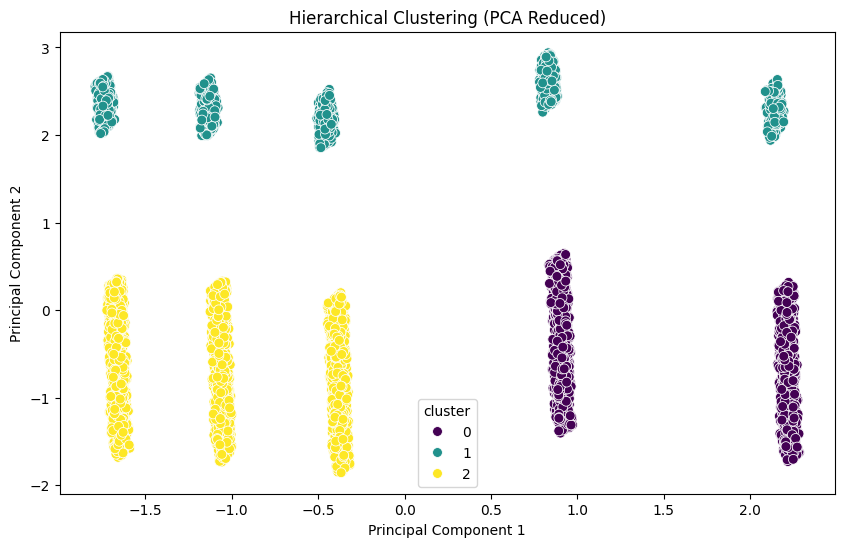

In [194]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = transaction_data['hierarchical_cluster']

# Plot PCA with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [195]:
df_grouped = transaction_data.groupby(['hierarchical_cluster', 'transaction_type'])['transaction_id'].count()
most_frequent_transactions = df_grouped.groupby('hierarchical_cluster').idxmax()

print("Most Frequent Transaction Type per Cluster:")
for cluster, transaction_type in most_frequent_transactions:
    print(f"Cluster {cluster} is dominated by {transaction_type} transactions.")


Most Frequent Transaction Type per Cluster:
Cluster 0 is dominated by withdrawal transactions.
Cluster 1 is dominated by deposit transactions.
Cluster 2 is dominated by Purchases transactions.


# 3) Recommendation System

In [ ]:
# recommendation_data.to_csv('recommendation_data.csv', index=False)

In [ ]:
# df = pd.read_csv('recommendation_data.csv')

In [144]:
df = recommendation_data.copy()

In [145]:
df.head(1)

,customer_id,product_id,interaction_type,interaction_date,interaction_details
0,C779,f8d870fe-d83b-4abb-b001-b7a70185753f,purchased,2025-01-23,Forex Card


## Collaborative Filtering

In [146]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item interaction matrix
user_item_matrix = pd.pivot_table(df, index='customer_id', columns='interaction_details', values='interaction_type', aggfunc='count', fill_value=0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)


def recommend_items(user_id, user_similarity_matrix, user_item_matrix, top_n=5):
    # Finding the similarity scores of the user with other users
    user_index = user_item_matrix.index.get_loc(user_id)
    similarity_scores = user_similarity_matrix[user_index]

    # Sort the users by similarity score in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Exclude the user itself
    sorted_indices = sorted_indices[1:]

    recommendations = []
    for similar_user_index in sorted_indices:
        similar_user_id = user_item_matrix.index[similar_user_index]
        items_interacted = user_item_matrix.loc[similar_user_id][user_item_matrix.loc[similar_user_id] > 0].index.tolist()
        for item in items_interacted:
            if user_item_matrix.loc[user_id, item] == 0:
                recommendations.append(item)
        if len(recommendations) >= top_n:
            break

    return recommendations[:top_n]



In [147]:
# For single user
recommendations = recommend_items("C1", user_similarity, user_item_matrix)
recommendations

['Fixed Deposit Details',
 'Statement Download',
 'EMI Schedule',
 'Fixed Deposit Details',
 'Set Goals']

In [148]:
# Top recommendation for all the single users
for user_id in user_item_matrix.index:
    recommendations = recommend_items(user_id, user_similarity, user_item_matrix)
    print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user C1: ['Fixed Deposit Details', 'Statement Download', 'EMI Schedule', 'Fixed Deposit Details', 'Set Goals']
Recommendations for user C10: ['Fixed Deposit', 'Health Insurance', 'Home Loan', 'Portfolio', 'Account Details']
Recommendations for user C100: ['Apply for a Loan', 'Exchange Rates', 'Fixed Deposit', 'Home Loan', 'Personal Loan']
Recommendations for user C1000: ['Exchange Rates', 'Portfolio', 'Account Details', 'Exchange Rates', 'Fixed Deposit Details']
Recommendations for user C101: ['Exchange Rates', 'EMI Calculator', 'Policy Details', 'EMI Calculator', 'Exchange Rates']
Recommendations for user C102: ['Credit Card', 'Exchange Rates', 'Fixed Deposit', 'Portfolio', 'Apply for a Loan']
Recommendations for user C103: ['Credit Card', 'Mutual Fund Details', 'Open Fixed Deposit', 'Personal Loan', 'Policy Details']
Recommendations for user C104: ['Fixed Deposit', 'Mutual Funds', 'Personal Loan', 'Transaction History', 'Exchange Rates']
Recommendations for user C

In [149]:
# Most Frequently Used
from collections import Counter

all_recommendations = []
for user_id in user_item_matrix.index:
    recommendations = recommend_items(user_id, user_similarity, user_item_matrix)
    all_recommendations.extend(recommendations)

# Counting the frequency of each recommendation
recommendation_counts = Counter(all_recommendations)

# Get the most frequent recommendation
most_frequent_recommendation = recommendation_counts.most_common(1)

print(f"The most frequent recommendation in collaborative filtering is: {most_frequent_recommendation}")

The most frequent recommendation in collaborative filtering is: [('Account Details', 236)]


In [150]:
# top 5 most frequent recommendations for all the users
top_5_recommendations = recommendation_counts.most_common(5)

print(f"The top 5 most frequent recommendations in collaborative filtering are: {top_5_recommendations}")

The top 5 most frequent recommendations in collaborative filtering are: [('Account Details', 236), ('Apply for a Loan', 230), ('Balance', 222), ('Exchange Rates', 211), ('Bill Payment History', 207)]


In [151]:
# Cumulative Gain (NDCG).
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, ndcg_score

# Assuming 'actual_interactions' is a DataFrame with 'customer_id' and 'interaction_details'
# representing the actual interactions of users with items.
# and 'recommendations' are generated as in the previous code

def calculate_metrics(actual_interactions, recommendations):
    """
    Calculates precision, recall, MAP, and NDCG for a collaborative filtering model.
    """
    all_precisions = []
    all_recalls = []
    all_ndcgs = []


    for user_id in actual_interactions['customer_id'].unique():
        actual = actual_interactions[actual_interactions['customer_id'] == user_id]['interaction_details'].tolist()
        predicted = recommendations.get(user_id, []) # Handle cases where no recommendations are made

        #Precision and recall
        if actual and predicted: # Ensure both actual and predicted have items
            # Check if each predicted item is in actual interactions
            relevant_predictions = [1 if item in actual else 0 for item in predicted]

            precision = precision_score(relevant_predictions, [1]*len(predicted), average='binary', zero_division=0)
            recall = recall_score(relevant_predictions, [1]*len(predicted), average='binary', zero_division=0)

            all_precisions.append(precision)
            all_recalls.append(recall)

            # NDCG Calculation
            # Convert interaction details to numerical relevance scores (e.g., 1 for relevant, 0 for irrelevant)
            actual_relevance = [1 if item in predicted else 0 for item in actual]
            predicted_relevance = [1] * len(predicted)
            if actual_relevance and predicted_relevance:
              try:
                  ndcg = ndcg_score([actual_relevance], [predicted_relevance])
                  all_ndcgs.append(ndcg)
              except ValueError:
                pass

    # Calculate mean average precision (MAP)
    map_score = np.mean(all_precisions) if all_precisions else 0
    mean_recall = np.mean(all_recalls) if all_recalls else 0
    mean_ndcg = np.mean(all_ndcgs) if all_ndcgs else 0

    return {
        "precision": map_score,
        "recall": mean_recall,
        "map": map_score,
        "ndcg": mean_ndcg
    }


recommendations = {}
for user in user_item_matrix.index:
    recommendations[user] = recommend_items(user, user_similarity, user_item_matrix)

metrics = calculate_metrics(df, recommendations)
print("Evalutation Metrics for Collaborative Filtering: ",metrics)

Evalutation Metrics for Collaborative Filtering:  {'precision': 0.0, 'recall': 0.0, 'map': 0.0, 'ndcg': 0.0}


## Content Based Filtering

In [152]:
# Create a user-item interaction matrix based on interaction details
user_item_matrix_content = pd.pivot_table(df, index='customer_id', columns='interaction_details', values='interaction_type', aggfunc='count', fill_value=0)

# Calculate cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix_content.T)

# Function to recommend items based on content
def recommend_items_content_based(user_id, user_item_matrix, item_similarity_matrix, top_n=5):
    user_interactions = user_item_matrix.loc[user_id]

    # Get items the user has interacted with
    interacted_items = user_interactions[user_interactions > 0].index.tolist()

    # Calculate weighted average of item similarities for all items
    item_scores = {}
    for item in user_item_matrix.columns:
        score = 0
        for interacted_item in interacted_items:
            score += item_similarity_matrix[user_item_matrix.columns.get_loc(item), user_item_matrix.columns.get_loc(interacted_item)] * user_interactions[interacted_item]
        item_scores[item] = score

    # Sort items by score and return top N
    sorted_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = [item for item, score in sorted_items if item not in interacted_items][:top_n]

    return recommendations



In [153]:
# Top recommendation for single user
recommendations_content = recommend_items_content_based("C1", user_item_matrix_content, item_similarity)
recommendations_content

['Transaction History',
 'Statement Download',
 'Account Details',
 'Forex Card',
 'Personal Loan']

In [154]:
# Top recommendation for all the single users
for user_id in user_item_matrix.index:
    recommendations = recommend_items_content_based(user_id, user_item_matrix_content, item_similarity)
    print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user C1: ['Transaction History', 'Statement Download', 'Account Details', 'Forex Card', 'Personal Loan']
Recommendations for user C10: ['Mutual Funds', 'Account Details', 'Pay Bills', 'Policy Details', 'Forex Card']
Recommendations for user C100: ['Personal Loan', 'Home Loan', 'Fixed Deposit', 'Spending Analysis', 'Transfer Funds']
Recommendations for user C1000: ['Pay Bills', 'Account Details', 'Mutual Funds', 'Apply for a Loan', 'Portfolio']
Recommendations for user C101: ['Transfer Funds', 'Transaction History', 'Open Fixed Deposit', 'Balance', 'Pay Bills']
Recommendations for user C102: ['Apply for a Loan', 'Renew Policy', 'Statement Download', 'Fixed Deposit', 'Mutual Fund Details']
Recommendations for user C103: ['Personal Loan', 'Statement Download', 'Balance', 'Credit Card', 'Mutual Fund Details']
Recommendations for user C104: ['Portfolio', 'Personal Loan', 'Open Fixed Deposit', 'Apply for a Loan', 'Forex Card']
Recommendations for user C105: ['Transfer Fun

In [155]:
# Most frequently repeated for all the users
from collections import Counter
recommendations_content = {}

for user_id in user_item_matrix.index:
    recommendations_content[user_id] = recommend_items_content_based(user_id, user_item_matrix_content, item_similarity)

all_recommendations = []
for user_id, recommendations in recommendations_content.items():
    all_recommendations.extend(recommendations)

recommendation_counts = Counter(all_recommendations)

most_frequent_recommendation = recommendation_counts.most_common(1)

if most_frequent_recommendation:
  print(f"The most frequent recommendation in Content Based Filtering is: {most_frequent_recommendation[0][0]} (appeared {most_frequent_recommendation[0][1]} times)")
else:
  print("No recommendations found.")

The most frequent recommendation in Content Based Filtering is: Pay Bills (appeared 510 times)


In [156]:
# top 5 recommendations for all the users
from collections import Counter

all_recommendations = []
for user_id, recommendations in recommendations_content.items():
    all_recommendations.extend(recommendations)

# Count the frequency of each recommendation
recommendation_counts = Counter(all_recommendations)

# Get the top 5 most frequent recommendations
top_5_recommendations = recommendation_counts.most_common(5)

print(f"The top 5 most frequent recommendations in Content Based Filtering are: {top_5_recommendations}")

The top 5 most frequent recommendations in Content Based Filtering are: [('Pay Bills', 510), ('Personal Loan', 496), ('Account Details', 439), ('Transaction History', 312), ('Open Fixed Deposit', 286)]


In [157]:
# Cumulative Gain (NDCG).
# metrics for this content based filtering

from sklearn.metrics import precision_score, recall_score, ndcg_score
import numpy as np

def calculate_metrics(actual, predicted):

    # Precision
    precision = precision_score(np.array([1 if item in actual else 0 for item in predicted]), np.ones(len(predicted)), average='binary')


    # Recall
    recall = recall_score(np.array([1 if item in actual else 0 for item in predicted]), np.ones(len(predicted)), average='binary')


    # MAP (Mean Average Precision)
    relevant_items_indices = [i for i, item in enumerate(predicted) if item in actual]
    if len(relevant_items_indices) == 0:
        map_score = 0  # Handle the case where no items are relevant.
    else:
        map_score = np.mean([ (i + 1) / (j + 1) for i,j in enumerate(relevant_items_indices)])


    # NDCG (Normalized Discounted Cumulative Gain)
    relevance = np.array([1 if item in actual else 0 for item in predicted])
    ideal_relevance = np.sort(relevance)[::-1]  # Ideal ranking for comparison
    ndcg = ndcg_score([ideal_relevance], [relevance])

    return {
        "precision": precision,
        "recall": recall,
        "map": map_score,
        "ndcg": ndcg,
    }

actual_interactions = ["Savings Account", "Fixed Deposit", "Personal Loan"]
predicted_recommendations = ["Savings Account", "Home Loan", "Credit Card", "Fixed Deposit"]

metrics = calculate_metrics(actual_interactions, predicted_recommendations)
print("Evalutation Metrics for Content Based Filtering: ",metrics)

Evalutation Metrics for Content Based Filtering:  {'precision': 0.5, 'recall': 1.0, 'map': 0.75, 'ndcg': 0.7853208594776601}
